In [1]:
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import jupyter
import pymssql
import plotly 
plotly.tools.set_credentials_file(username='perryraskin', api_key='2Qc3hhnv8Z4aEiUdajJ2')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import preprocessing
%matplotlib inline
pd.options.mode.chained_assignment = None
import glglive

In [2]:
glglive.say_hi()

hello


In [3]:
glg_data = glglive.pandas_the_data('./sql/Scheduling_Data_PSS.sql')

In [4]:
glg_data

,Week,PSS_Member_Name,PSS_Member_Email,Total_Requests_Recieved,Total_Scheduled_Calls,Unique_Calls_Scheduled,Initial_Schedule_Avg_turnaround_In_Hours,Second_Schedule_Avg_Turmaround_In_Hours,Third_Schedule_Avg_Turmaround_In_Hours
0,2017-01-01,Austin Rittenberry,ARittenberry@glgroup.com,28,63,63,33,23,145
1,2017-01-01,Demi Young,DYOUNG@glgroup.com,0,8,8,0,0,0
2,2017-01-01,Emily Colwell,ECOLWELL@glgroup.com,0,23,22,0,0,0
3,2017-01-01,Erin DeGeer,EDeGeer@glgroup.com,0,9,9,0,0,0
4,2017-01-01,Heather Loflin,hloflin@glgroup.com,2,2,2,53,0,0
5,2017-01-01,Lena Armuth,larmuth@glgroup.com,0,61,57,0,0,0
6,2017-01-01,Nikitha Aithal,NAITHAL@glgroup.com,0,17,17,0,0,0
7,2017-01-01,Ossian Olausson,oolausson@glgroup.com,0,49,49,0,0,0
8,2017-01-01,Samantha Byrd,SByrd@glgroup.com,0,35,34,0,0,0
9,2017-01-01,Shane Summers,SSummers@glgroup.com,0,20,20,0,0,0


In [5]:
df = pd.DataFrame(glg_data)
#df.rename(columns={0: 'Name', 1: 'Continent', 2: 'Population', 3: 'LifeExpectancy', 4:'GNP'}, inplace=True);
#df = df.sort(['Total_Requests_Received'], ascending=[1]);

In [6]:
df.head()

,Week,PSS_Member_Name,PSS_Member_Email,Total_Requests_Recieved,Total_Scheduled_Calls,Unique_Calls_Scheduled,Initial_Schedule_Avg_turnaround_In_Hours,Second_Schedule_Avg_Turmaround_In_Hours,Third_Schedule_Avg_Turmaround_In_Hours
0,2017-01-01,Austin Rittenberry,ARittenberry@glgroup.com,28,63,63,33,23,145
1,2017-01-01,Demi Young,DYOUNG@glgroup.com,0,8,8,0,0,0
2,2017-01-01,Emily Colwell,ECOLWELL@glgroup.com,0,23,22,0,0,0
3,2017-01-01,Erin DeGeer,EDeGeer@glgroup.com,0,9,9,0,0,0
4,2017-01-01,Heather Loflin,hloflin@glgroup.com,2,2,2,53,0,0


In [7]:
trace1 = Bar(
     x=df['Total_Scheduled_Calls'],
     y=df['Unique_Calls_Scheduled']
)
layout = Layout(
     title='Some GLG Data',
     xaxis=XAxis( title='Total Scheduled Calls' ),
     yaxis=YAxis( type='log', title='Unique Calls Scheduled' )
)
data = Data([trace1])
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='glg_data_1')

In [8]:

import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
     x=df['Total_Scheduled_Calls'],
     name = 'Total Calls',
     connectgaps=True
)
trace2 = go.Scatter(
     x=df['Unique_Calls_Scheduled'],
     name = 'Unique Calls',
     connectgaps=True
)
layout = Layout(
     title='More GLG Data',
     xaxis=XAxis( title='Total Scheduled Calls' )
)
data = [trace1, trace2]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='glg_connected_lines')

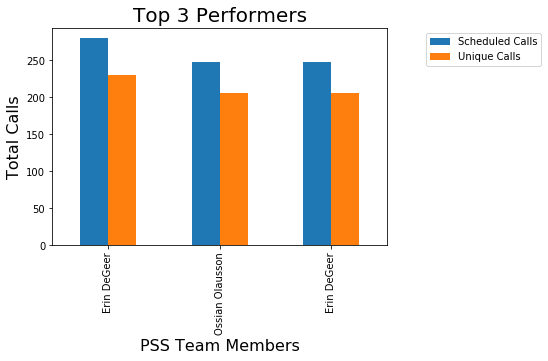

In [107]:
# sort df by descending Total Scheduled Calls
dfs = df.sort_values(['Total_Scheduled_Calls'], ascending=False)
# reset index
dfst = dfs.reset_index()

# numbers from table
groups = [[dfst['Total_Scheduled_Calls'][0],dfst['Unique_Calls_Scheduled'][0]],
       [dfst['Total_Scheduled_Calls'][1],dfst['Unique_Calls_Scheduled'][1]],
       [dfst['Total_Scheduled_Calls'][2],dfst['Unique_Calls_Scheduled'][2]]]
group_labels = [dfst['PSS_Member_Name'][0], dfst['PSS_Member_Name'][1], dfst['PSS_Member_Name'][2]]
group_metrics = ["Scheduled Calls", "Unique Calls"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar().legend(bbox_to_anchor=(1.1, 1))
plt.title('Top 3 Performers', fontsize= 20)
plt.xlabel('PSS Team Members', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

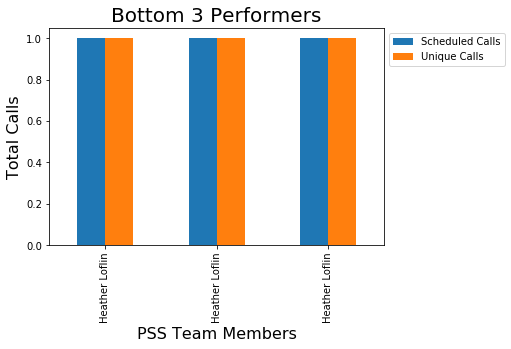

In [106]:
# sort df by ascending Total Scheduled Calls
dfs = df.sort_values(['Total_Scheduled_Calls'], ascending=True)
# reset index
dfst = dfs.reset_index()

# numbers from table
groups = [[dfst['Total_Scheduled_Calls'][0],dfst['Unique_Calls_Scheduled'][0]],
       [dfst['Total_Scheduled_Calls'][1],dfst['Unique_Calls_Scheduled'][1]],
       [dfst['Total_Scheduled_Calls'][2],dfst['Unique_Calls_Scheduled'][2]]]
group_labels = [dfst['PSS_Member_Name'][0], dfst['PSS_Member_Name'][1], dfst['PSS_Member_Name'][2]]
group_metrics = ["Scheduled Calls", "Unique Calls"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar().legend(bbox_to_anchor=(1, 1))
plt.title('Bottom 3 Performers', fontsize= 20)
plt.xlabel('PSS Team Members', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

In [103]:
# sort df by ascending Total Scheduled Calls
dfs = df.sort_values(['Total_Scheduled_Calls'], ascending=True)
# reset index
dfst = dfs.reset_index()
dfst

,index,Week,PSS_Member_Name,PSS_Member_Email,Total_Requests_Recieved,Total_Scheduled_Calls,Unique_Calls_Scheduled,Initial_Schedule_Avg_turnaround_In_Hours,Second_Schedule_Avg_Turmaround_In_Hours,Third_Schedule_Avg_Turmaround_In_Hours
0,27,2017-01-15,Heather Loflin,hloflin@glgroup.com,7,1,1,74,0,0
1,429,2017-07-09,Heather Loflin,hloflin@glgroup.com,0,1,1,0,0,0
2,168,2017-03-26,Heather Loflin,hloflin@glgroup.com,0,1,1,0,0,0
3,184,2017-04-02,Heather Loflin,hloflin@glgroup.com,0,1,1,0,0,0
4,216,2017-04-16,Heather Loflin,hloflin@glgroup.com,0,1,1,0,0,0
5,482,2017-07-30,Austin Rittenberry,ARittenberry@glgroup.com,0,1,1,0,0,0
6,244,2017-04-30,Alex Jordan,AJordan@glgroup.com,0,1,1,0,0,0
7,250,2017-04-30,Heather Loflin,hloflin@glgroup.com,0,1,1,0,0,0
8,337,2017-06-04,Heather Loflin,hloflin@glgroup.com,1,1,1,0,0,0
9,321,2017-05-28,Kyndal Hammock,KHammock@glgroup.com,14,1,1,0,0,0


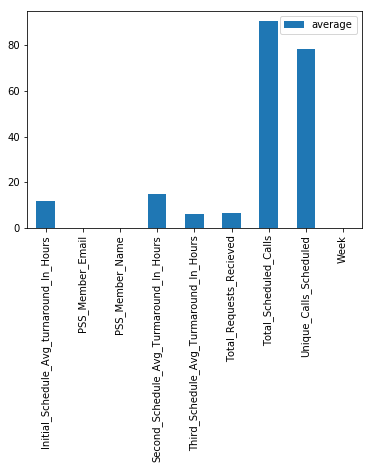

In [11]:
pd.concat(
    [df.mean().rename('average'), df.min().rename('min'), df.max().rename('max')],
    axis=1
).plot.bar()